In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Based on the training data concerning Titanic passengers, I am creating a model to predict which of the passengers (from the test data file) survived the disaster.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
train_data = pd.read_csv('/content/train.csv')
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Data Exploration and Preliminary Data Analysis and Visualization

In [ ]:
train_data.shape

(891, 12)

In [ ]:
train_data.duplicated().sum()

0

In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* SibSp - Number of Siblings/Spouses Aboard [1, 0, 3, 4, 2, 5, 8]
* Parch - Number of Parents/Children Aboard [0, 1, 2, 5, 3, 4, 6]
* Fare - Passenger Fare (British pound)
* Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton, nan)

In [ ]:
#train_data['Age'].unique()

In [ ]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Text(0.5, 1.0, 'Survival based on Sex')

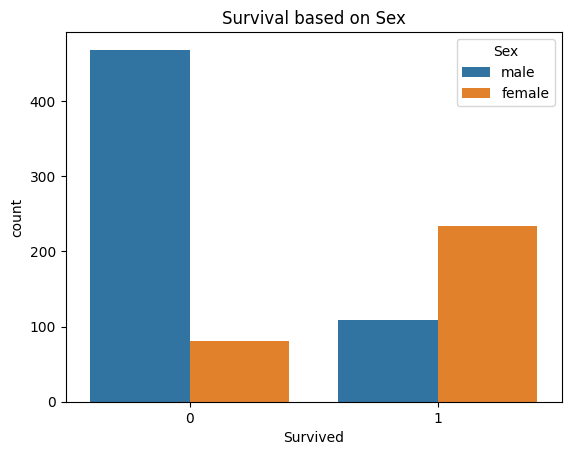

In [ ]:
sns.countplot(data=train_data, x='Survived', hue='Sex')
plt.title('Survival based on Sex')

Text(0.5, 1.0, 'Survival based on Pclass')

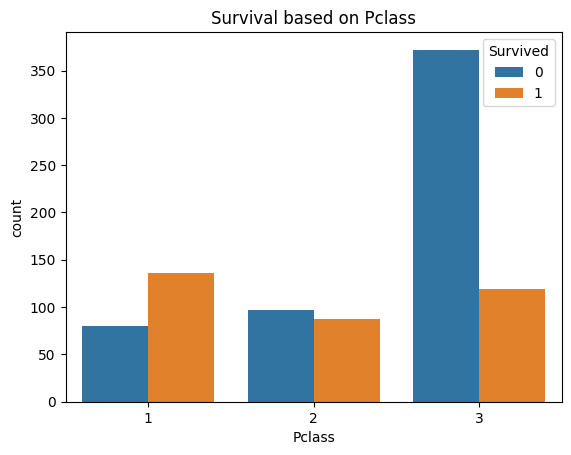

In [ ]:
sns.countplot(data=train_data, x='Pclass', hue='Survived')
plt.title('Survival based on Pclass')

Text(0.5, 1.0, 'Survival based on Number of Parents/Children Aboard')

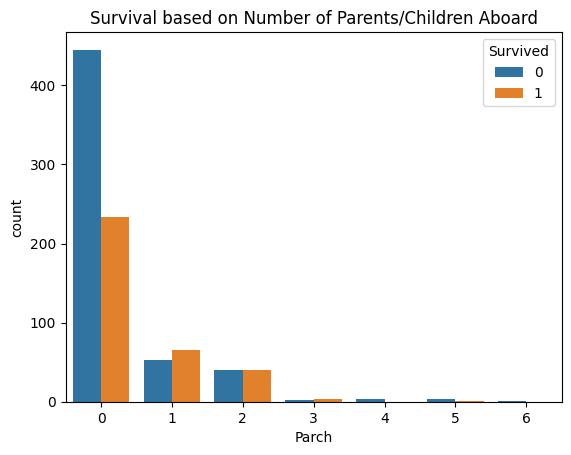

In [ ]:
sns.countplot(x='Parch', data=train_data, hue='Survived')
plt.title('Survival based on Number of Parents/Children Aboard')

Text(0.5, 1.0, 'Survival based on Siblings/Spouses Aboard')

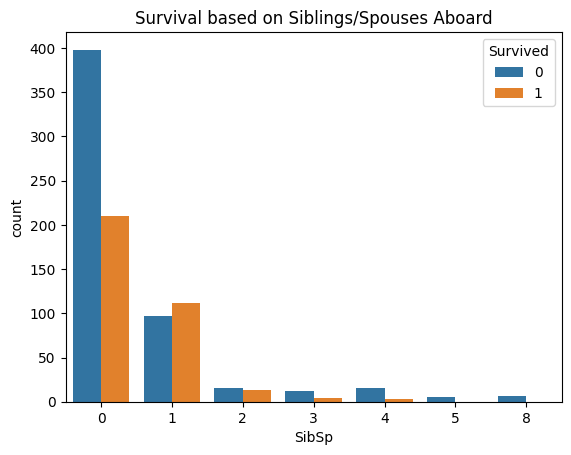

In [ ]:
sns.countplot(x='SibSp', data=train_data, hue='Survived')
plt.title('Survival based on Siblings/Spouses Aboard')

Text(0.5, 1.0, 'Survival based on Port of Embarkation')

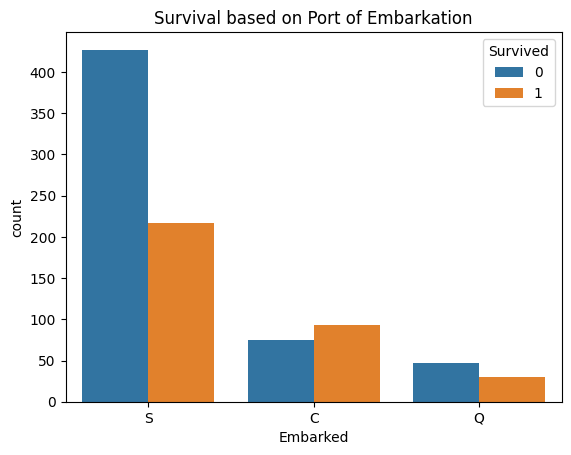

In [ ]:
sns.countplot(data=train_data, x='Embarked', hue='Survived')
plt.title('Survival based on Port of Embarkation')

In [ ]:
train_data = train_data.dropna(subset=['Age'])
train_data.shape

(714, 12)

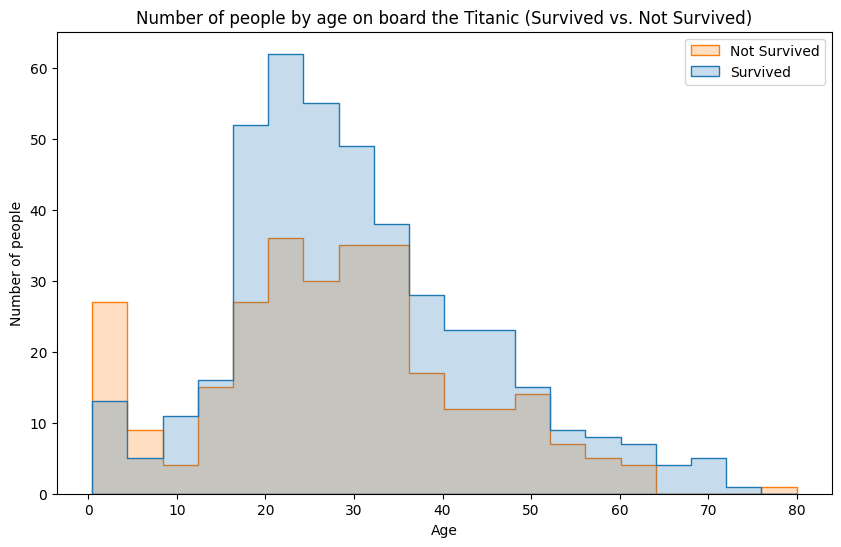

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Age', hue='Survived', bins=20, element='step', common_norm=False)
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Number of people by age on board the Titanic (Survived vs. Not Survived)')
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()

### Data Preprocessing and Scaling

Data split to train and test

In [ ]:
train_df = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape,"\n")

X_train shape: (571, 7)
y_train shape: (571,) 



Shapiro-Wilk Test

In [ ]:
scipy.stats.shapiro(X_train.Age) #skewed

ShapiroResult(statistic=0.9797593951225281, pvalue=4.149678716203198e-07)

In [ ]:
scipy.stats.shapiro(X_train.Fare) #skewed

ShapiroResult(statistic=0.583960771560669, pvalue=9.69152618336003e-35)

get_dummies()

In [ ]:
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'])
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
328,3,31.0,1,1,20.5250,1,0,0,0,1
73,3,26.0,1,0,14.4542,0,1,1,0,0
253,3,30.0,1,0,16.1000,0,1,0,0,1
719,3,33.0,0,0,7.7750,0,1,0,0,1
666,2,25.0,0,0,13.0000,0,1,0,0,1


In [ ]:
X_val = pd.get_dummies(X_val, columns=['Sex', 'Embarked'])
X_val.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
149,2,42.0,0,0,13.00,0,1,0,0,1
407,2,3.0,1,1,18.75,0,1,0,0,1
53,2,29.0,1,0,26.00,1,0,0,0,1
369,1,24.0,0,0,69.30,1,0,1,0,0
818,3,43.0,0,0,6.45,0,1,0,0,1


MinMaxScaler

In [ ]:
mm_scaler = MinMaxScaler()

In [ ]:
t_cols = X_train[['Age','Fare','SibSp', 'Parch']]
result = mm_scaler.fit_transform(t_cols)
X_train_mm = pd.DataFrame(result, columns=['Age','Fare','SibSp', 'Parch'])
X_train_mm.head()

,Age,Fare,SibSp,Parch
0,0.384267,0.040062,0.2,0.166667
1,0.321438,0.028213,0.2,0.000000
2,0.371701,0.031425,0.2,0.000000
3,0.409399,0.015176,0.0,0.000000
4,0.308872,0.025374,0.0,0.000000


In [ ]:
v_cols = X_val[['Age','Fare','SibSp', 'Parch']]
result = mm_scaler.transform(v_cols)
X_val_mm = pd.DataFrame(result, columns=['Age','Fare','SibSp', 'Parch'])
X_val_mm.head()

,Age,Fare,SibSp,Parch
0,0.522493,0.025374,0.0,0.000000
1,0.032420,0.036598,0.2,0.166667
2,0.359135,0.050749,0.2,0.000000
3,0.296306,0.135265,0.0,0.000000
4,0.535059,0.012590,0.0,0.000000


In [ ]:
X_train.update(X_train_mm)
X_train.head()
X_train.shape

(571, 10)

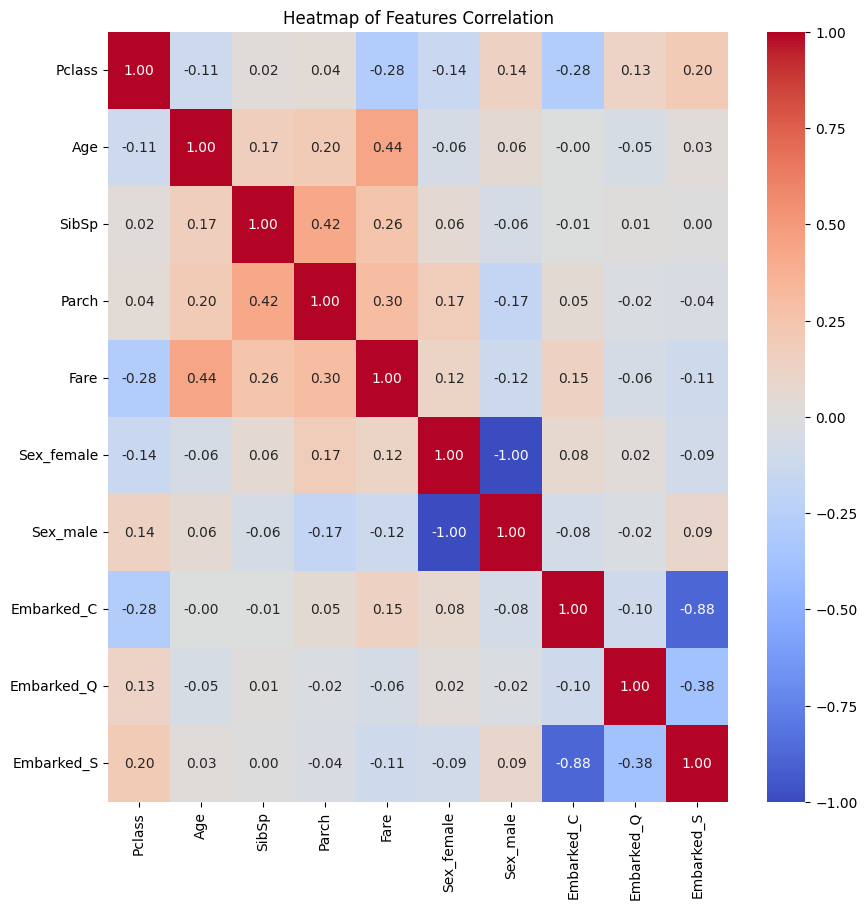

In [ ]:
plt.figure(figsize=(10, 10))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Features Correlation')
plt.show()

In [ ]:
X_train.shape

(571, 10)

In [ ]:
y_train.shape

(571,)

Feature importance selection

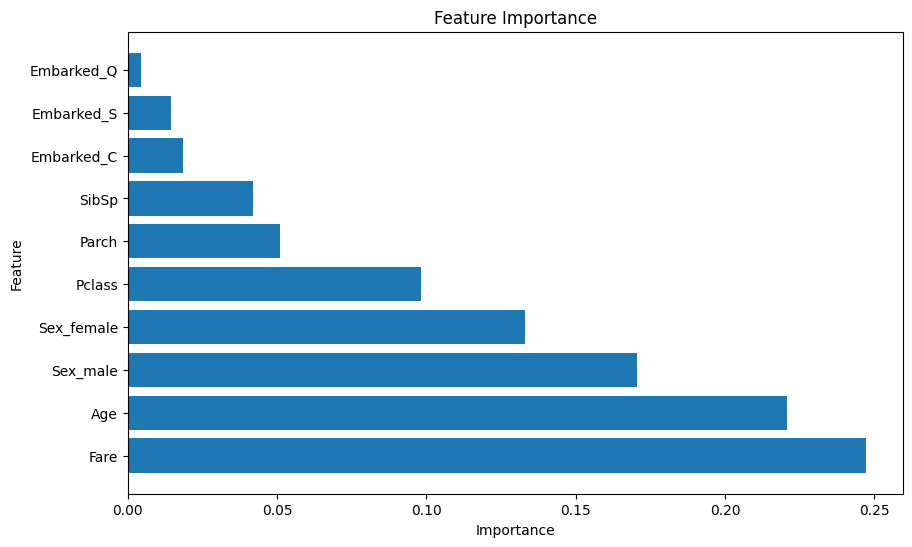

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ft_imp = model.feature_importances_

imp_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': ft_imp})
imp_df = imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6) ,)
plt.barh(imp_df['Feature'], imp_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=50,
                             max_depth=20,
                             min_samples_split=2,
                             min_samples_leaf=2)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=50)

In [ ]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.7972027972027972
Precision: 0.7288135593220338
Recall: 0.7678571428571429
F1: 0.7478260869565218
